In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/kaggle/input/heart-failure-clinical-data/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [4]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


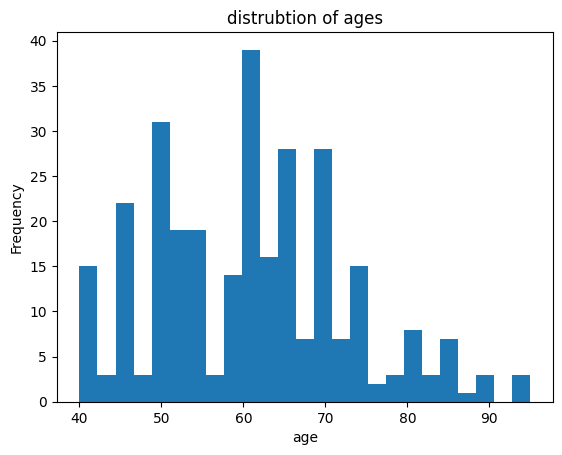

In [5]:
df['age'].plot(kind="hist",bins=25)
plt.xlabel("age")
plt.title("distrubtion of ages");

In [6]:
df[df['age']>90]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
26,95.0,1,112,0,40,1,196000.00,1.00,138,0,0,24,1
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
55,95.0,1,371,0,30,0,461000.00,2.00,132,1,0,50,1


In [7]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

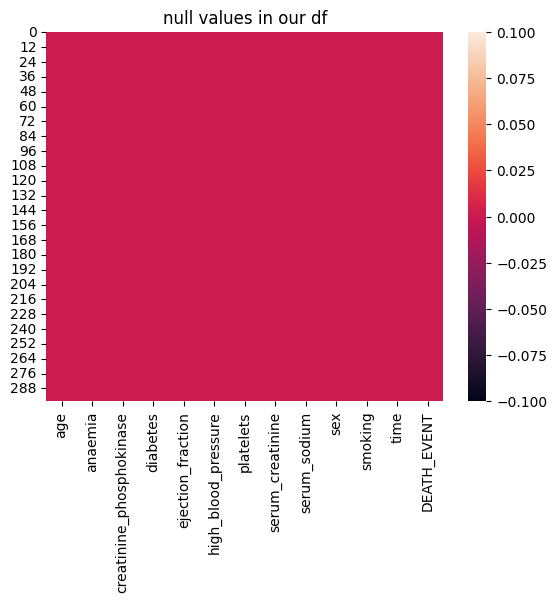

In [8]:
sns.heatmap(df.isnull())
plt.title("null values in our df");

In [9]:
df.duplicated().sum()

0

In [10]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

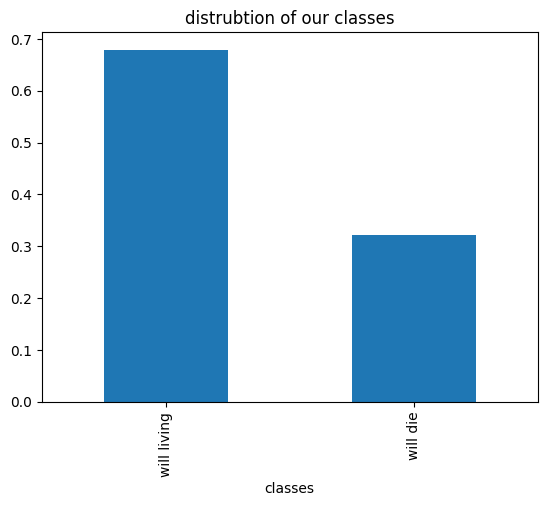

In [11]:
df['DEATH_EVENT'].value_counts(normalize=True).rename({0:"will living",1:"will die"}).plot(kind="bar")
plt.xlabel("classes")
plt.title("distrubtion of our classes");

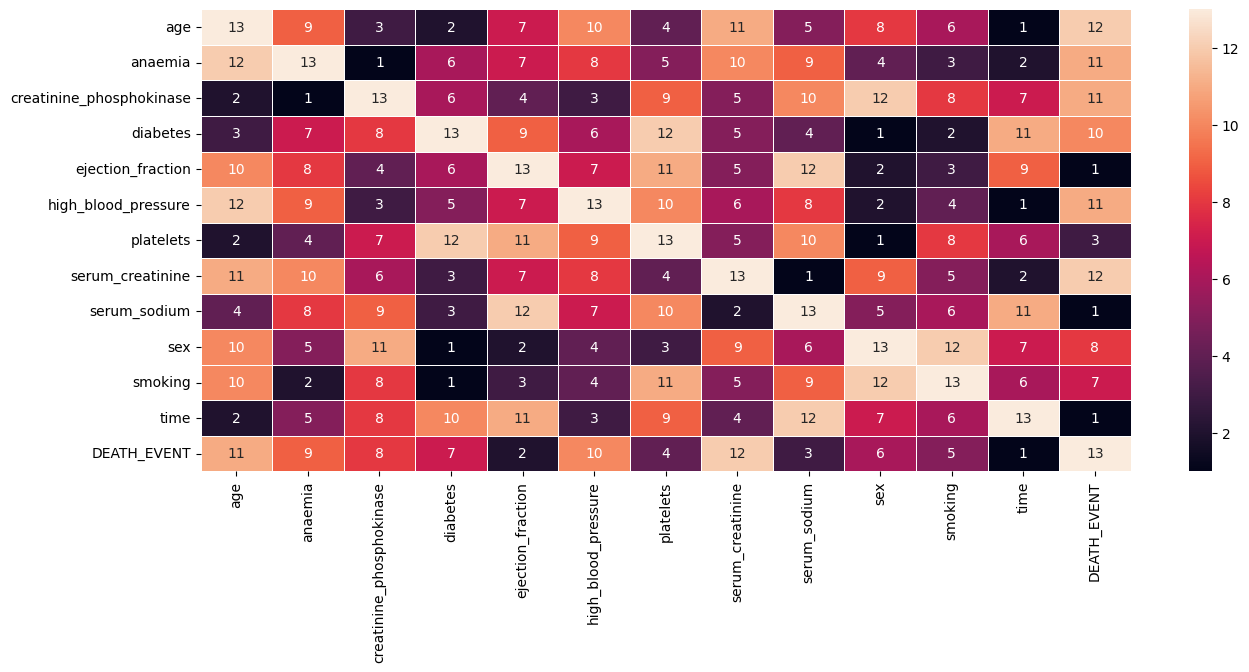

In [12]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr().rank(axis="columns"),annot=True,linewidth=.5);

as we see features that effect our target(death event) are age , anaemia , high blood pressure , serum crearine  and creatininie phosphokinase

# processing data

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [14]:
df.select_dtypes(object).columns

Index([], dtype='object')

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [16]:
X=df.drop(columns=['DEATH_EVENT'])
y=df['DEATH_EVENT']

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [18]:
from sklearn.metrics import accuracy_score
def do_models(model):
    my_model=model() # take object from model
    my_model.fit(X_train,y_train)
    predict=my_model.predict(X_test)
    print(confusion_matrix(y_test,predict))
    print(classification_report(y_test,predict))
    print("train score: ",accuracy_score(y_train,my_model.predict(X_train)))
    print("test score: ",accuracy_score(y_test,predict))
do_models(GradientBoostingClassifier)

[[37  7]
 [14 17]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        44
           1       0.71      0.55      0.62        31

    accuracy                           0.72        75
   macro avg       0.72      0.69      0.70        75
weighted avg       0.72      0.72      0.71        75

train score:  1.0
test score:  0.72


In [19]:
do_models(SVC)

[[44  0]
 [31  0]]
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        44
           1       0.00      0.00      0.00        31

    accuracy                           0.59        75
   macro avg       0.29      0.50      0.37        75
weighted avg       0.34      0.59      0.43        75

train score:  0.7098214285714286
test score:  0.5866666666666667


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
do_models(RandomForestClassifier)

[[37  7]
 [14 17]]
              precision    recall  f1-score   support

           0       0.73      0.84      0.78        44
           1       0.71      0.55      0.62        31

    accuracy                           0.72        75
   macro avg       0.72      0.69      0.70        75
weighted avg       0.72      0.72      0.71        75

train score:  1.0
test score:  0.72


In [21]:
do_models(KNeighborsClassifier)

[[39  5]
 [29  2]]
              precision    recall  f1-score   support

           0       0.57      0.89      0.70        44
           1       0.29      0.06      0.11        31

    accuracy                           0.55        75
   macro avg       0.43      0.48      0.40        75
weighted avg       0.45      0.55      0.45        75

train score:  0.7544642857142857
test score:  0.5466666666666666


In [22]:
do_models(DecisionTreeClassifier)

[[36  8]
 [18 13]]
              precision    recall  f1-score   support

           0       0.67      0.82      0.73        44
           1       0.62      0.42      0.50        31

    accuracy                           0.65        75
   macro avg       0.64      0.62      0.62        75
weighted avg       0.65      0.65      0.64        75

train score:  1.0
test score:  0.6533333333333333
